In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset from CSV file
df = pd.read_csv('iris.data')

In [15]:
# Plot LDA-transformed data
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(df[y == label, 0], df[y == label, 1], label=label)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Transformed Data')
plt.legend()
plt.grid(True)
plt.show()

InvalidIndexError: (array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False]), 0)

<Figure size 800x600 with 0 Axes>

In [3]:
# Extract the features (assuming they are numeric)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [5]:
# Compute class means
c_means = [np.mean(X[y == c], axis=0) for c in np.unique(y)]

In [6]:
# Compute within-class scatter matrix
Sw = sum((X[y == c] - c_means[c]).T.dot(X[y == c] - c_means[c]) for c in range(len(c_means)))

In [7]:
# Compute overall mean
overall_mean = np.mean(X, axis=0)

In [8]:
# Compute between-class scatter matrix
Sb = sum(len(X[y == c]) * np.outer(c_means[c] - overall_mean, c_means[c] - overall_mean) for c in range(len(c_means)))

In [9]:
# Regularization parameter
reg_param = 0.05  # You can adjust this parameter

# Compute within-class scatter matrix with regularization
Sw_reg = Sw + reg_param * np.eye(Sw.shape[0])

In [10]:
# Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw_reg).dot(Sb))

In [11]:
# Sort eigenvectors by decreasing eigenvalues
idx = np.argsort(abs(eigvals))[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

In [12]:
# Choose top k eigenvectors
k = 3
top_eigvecs = eigvecs[:, :k]

In [13]:
# Project data onto new feature space
lda_data = np.dot(X, top_eigvecs)

print("LDA Data (2 components):")
print(lda_data)

LDA Data (2 components):
[[0.2 1.4 3. ]
 [0.2 1.3 3.2]
 [0.2 1.5 3.1]
 [0.2 1.4 3.6]
 [0.4 1.7 3.9]
 [0.3 1.4 3.4]
 [0.2 1.5 3.4]
 [0.2 1.4 2.9]
 [0.1 1.5 3.1]
 [0.2 1.5 3.7]
 [0.2 1.6 3.4]
 [0.1 1.4 3. ]
 [0.1 1.1 3. ]
 [0.2 1.2 4. ]
 [0.4 1.5 4.4]
 [0.4 1.3 3.9]
 [0.3 1.4 3.5]
 [0.3 1.7 3.8]
 [0.3 1.5 3.8]
 [0.2 1.7 3.4]
 [0.4 1.5 3.7]
 [0.2 1.  3.6]
 [0.5 1.7 3.3]
 [0.2 1.9 3.4]
 [0.2 1.6 3. ]
 [0.4 1.6 3.4]
 [0.2 1.5 3.5]
 [0.2 1.4 3.4]
 [0.2 1.6 3.2]
 [0.2 1.6 3.1]
 [0.4 1.5 3.4]
 [0.1 1.5 4.1]
 [0.2 1.4 4.2]
 [0.1 1.5 3.1]
 [0.2 1.2 3.2]
 [0.2 1.3 3.5]
 [0.1 1.5 3.1]
 [0.2 1.3 3. ]
 [0.2 1.5 3.4]
 [0.3 1.3 3.5]
 [0.3 1.3 2.3]
 [0.2 1.3 3.2]
 [0.6 1.6 3.5]
 [0.4 1.9 3.8]
 [0.3 1.4 3. ]
 [0.2 1.6 3.8]
 [0.2 1.4 3.2]
 [0.2 1.5 3.7]
 [0.2 1.4 3.3]
 [1.4 4.7 3.2]
 [1.5 4.5 3.2]
 [1.5 4.9 3.1]
 [1.3 4.  2.3]
 [1.5 4.6 2.8]
 [1.3 4.5 2.8]
 [1.6 4.7 3.3]
 [1.  3.3 2.4]
 [1.3 4.6 2.9]
 [1.4 3.9 2.7]
 [1.  3.5 2. ]
 [1.5 4.2 3. ]
 [1.  4.  2.2]
 [1.4 4.7 2.9]
 [1.3 3.6 2.9]
 [1.4 4.4 3.1]


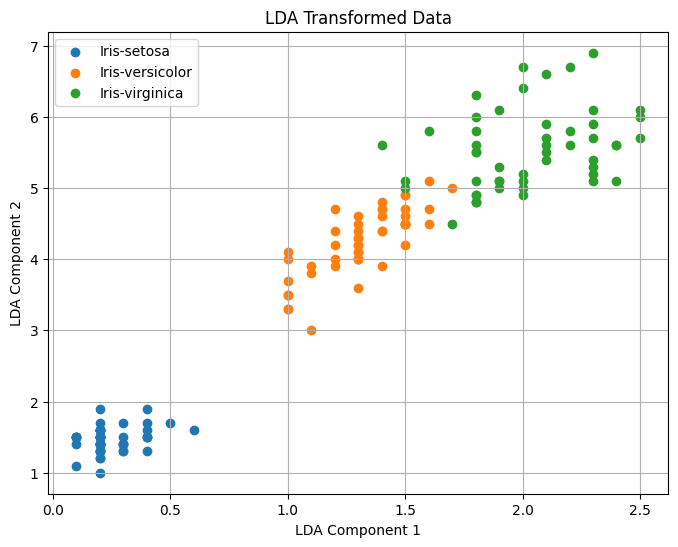

In [14]:
# Plot LDA-transformed data
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(lda_data[y == label, 0], lda_data[y == label, 1], label=label)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Transformed Data')
plt.legend()
plt.grid(True)
plt.show()